In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# КЛАСТЕРИЗАЦИЯ

Ссылка: https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis

Набор данных об уровне стресса студентов.

Целевая переменная - stress_level.

In [ ]:
data = pd.read_csv('StressLevelDataset.csv')
data

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


# Подготовка данных

Размер датасета

In [ ]:
data.shape

(1100, 21)

Статистическая информация

In [ ]:
data.describe(include='all')

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


Информация о наборе данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

Датасет содержит 21 столбец, 1100 строк. Все столбцы - числовые, пропусков нет.

Уровни стресса:

In [ ]:
data['stress_level'].unique()

array([1, 2, 0])

Проверим кол-во строк для каждого уровня

In [ ]:
data['stress_level'].value_counts()

,count
stress_level,
0,373
2,369
1,358


Разобьем датасет на:

Y - целевая переменная, которую предсказываем (stress_level).

X - весь набор данных без целевой переменной.

In [ ]:
X = data.drop(['stress_level'], axis=1)
y = data['stress_level']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (1100, 20) | y shape: (1100,) 


Стандартизация данных

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Воспользуется РСА для визуализации исходных данных

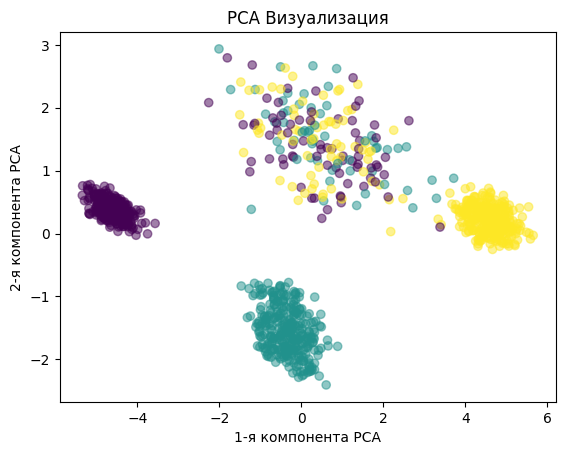

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.5)
plt.title('РСА Визуализация')
plt.xlabel('1-я компонента РСА')
plt.ylabel('2-я компонента РСА')
plt.show()

# K-Means

Найдем оптимальное количество классов для алгоритма KMeans с помощью метода логтя

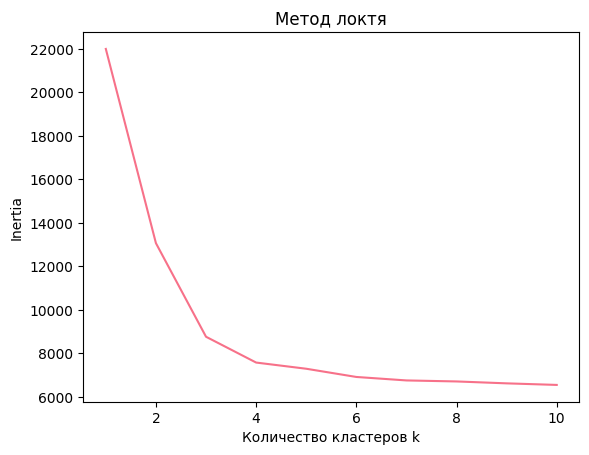

In [ ]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя')
plt.show()

Оптимальное число кластеров - 3


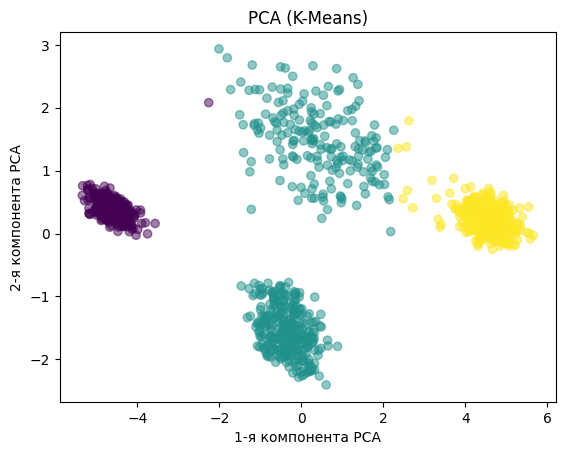

Оценка силуэта: 0.41700527843553103
Скорректированный индекс Рэнда: 0.6324706094304563


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, alpha=0.5)
plt.title('РСА (K-Means)')
plt.xlabel('1-я компонента РСА')
plt.ylabel('2-я компонента РСА')
plt.show()

print("Оценка силуэта:", silhouette_score(X_scaled, labels_kmeans))
print("Скорректированный индекс Рэнда:",adjusted_rand_score(y, labels_kmeans))

Значение оценки силуэта указывает на то, что кластеры не идеальны, точки данных не совсем компактны в пределых кластера, но это далеко не худший результат.

Значение скорректированного индекса Рэнда указывает на неплохое кластреное восстановление (значение выше среднего).

# Иерархическая кластеризация

Агломеративная кластеризация

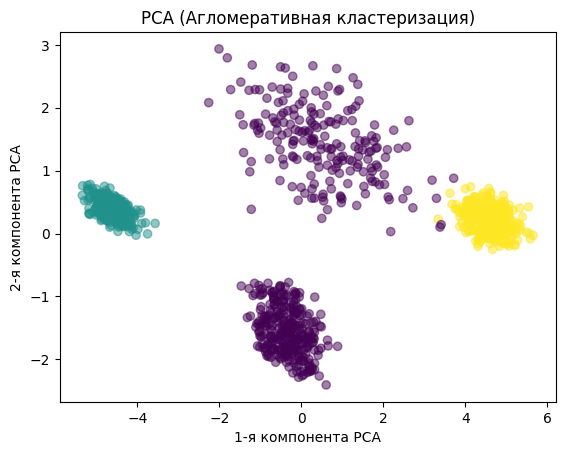

Оценка силуэта: 0.4135834069755028
Скорректированный индекс Рэнда: 0.6391313744352392


In [ ]:
aggl = AgglomerativeClustering(n_clusters=3)
labels_aggl = aggl.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_aggl, alpha=0.5)
plt.title('РСА (Агломеративная кластеризация)')
plt.xlabel('1-я компонента РСА')
plt.ylabel('2-я компонента РСА')
plt.show()

print("Оценка силуэта:", silhouette_score(X_scaled, labels_aggl))
print("Скорректированный индекс Рэнда:",adjusted_rand_score(y, labels_aggl))

Значение оценки силуэта почти такое же, как и для K-Means (ниже).

Значение скорректированного индекса Рэнда чуть
больше, чем для K-Means.

# DBSCAN

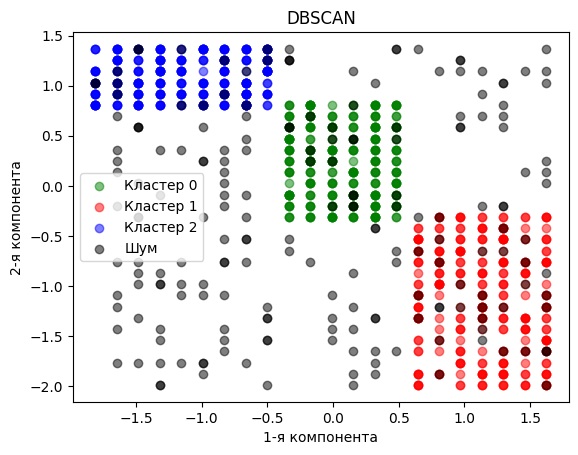

Оценка силуэта: 0.44220768807134847
Скорректированный индекс Рэнда: 0.710173627771341


In [ ]:
colors = ['green', 'red', 'blue']

dbscan = DBSCAN(eps=2.05, min_samples=10)
labels_dbsc = dbscan.fit_predict(X_scaled)
unique_labels = set(labels_dbsc)

for i, label in enumerate(unique_labels):
  if label == -1:
      plt.scatter(X_scaled[labels_dbsc == label, 0], X_scaled[labels_dbsc == label, 1],
                  c='black', label=f'Шум', alpha=0.5)
  else:
      plt.scatter(X_scaled[labels_dbsc == label, 0], X_scaled[labels_dbsc == label, 1],
                  c=colors[i], label=f'Кластер {label}', alpha=0.5)

plt.title('DBSCAN')
plt.xlabel('1-я компонента')
plt.ylabel('2-я компонента')
plt.legend()
plt.show()
print("Оценка силуэта:", silhouette_score(X_scaled, labels_dbsc))
print("Скорректированный индекс Рэнда:",adjusted_rand_score(y, labels_dbsc))

Значение оценки силуэта больше, чем у K-Means и агломеративной кластеризации.

Значение скорректированного индекса Рэнда больше, чем у K-Means и агломеративной кластеризации.

DBSCAN показывает более высокие оценки силуэта и скорректированного индекса Рэнда, что говорит о том, что он лучше разделяет кластеры и лучше согласуется с истинными метками, чем K-Means и агломеративная кластеризация.